In [111]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from xgboost import plot_tree
from xgboost import XGBClassifier
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz/bin"

In [15]:
# Open the .data file
df_census = pd.read_csv('adult.data', header=None)
# Name columns
df_census.columns=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', \
                   'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', \
                   'hours-per-week', 'native-country', 'income']

In [16]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [17]:
df_census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
# Convert columns with dtype object to numbers with pd.get_dummies
df_census = pd.get_dummies(df_census)

In [19]:
df_census.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,38,215646,9,0,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
3,53,234721,7,0,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,28,338409,13,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [20]:
df_census = df_census.drop('income_ <=50K', axis=1)
# X = predictor columns
X = df_census.iloc[:,:-1]
# y = target column
y = df_census.iloc[:,-1]

In [80]:
# Cross validation function for different ML models
def cross_val(classifier, num_splits=10):
    model=classifier
    scores = cross_val_score(model, X, y, cv=num_splits)
    print('Accuracy:', np.round(scores, 2))
    print('Accuracy mean:', np.round(scores.mean(), 2))

In [81]:
cross_val(LogisticRegression())

Accuracy: [0.8  0.8  0.79 0.8  0.79 0.81 0.79 0.79 0.79 0.8 ]
Accuracy mean: 0.8


In [85]:
cross_val(XGBClassifier(n_estimators=5))

Accuracy: [0.85 0.86 0.86 0.85 0.86 0.86 0.86 0.87 0.86 0.86]
Accuracy mean: 0.86


In [84]:
# Look at the coefficients for the logistic regression model
model = LogisticRegression()
model.fit(X,y)
coefficient_matrix = model.coef_
print(coefficient_matrix)
print(coefficient_matrix.max())

[[-2.76448054e-05 -6.50007363e-06 -6.31514027e-06  3.21165104e-04
   7.00587468e-04 -3.09464369e-05 -2.92453643e-07  6.87424227e-08
   1.84593445e-09 -1.37775001e-09 -1.35833058e-06  1.86526359e-07
  -7.59538375e-08 -3.33381964e-08 -3.74684426e-09 -1.65210876e-07
  -2.25797145e-07 -7.50997307e-08 -2.79367644e-08 -5.34948657e-08
  -1.23895167e-07 -9.45388186e-08 -3.38334846e-08 -5.09471936e-08
   4.73600594e-07  1.39259716e-07 -1.13176691e-06  3.22323209e-07
  -1.07790390e-08  1.61489284e-07 -6.11458950e-07 -7.31365630e-07
   2.89690489e-09  1.78496705e-06 -7.28239736e-08 -2.12424414e-06
  -1.80356880e-07 -1.87159466e-07 -2.93831393e-07 -4.77942740e-07
  -9.11892794e-10 -2.08156179e-07  5.58617327e-07 -1.73634378e-07
  -2.38462269e-07 -2.56989176e-07 -6.71710221e-07 -3.35762978e-08
   4.45337382e-07  2.97236927e-08 -8.21270463e-08  1.45944810e-08
  -1.19017426e-07  1.59595000e-06 -1.34541165e-06 -1.90880938e-07
  -1.12765747e-06 -6.57033968e-07  2.16947885e-07 -7.07663712e-08
  -5.26175

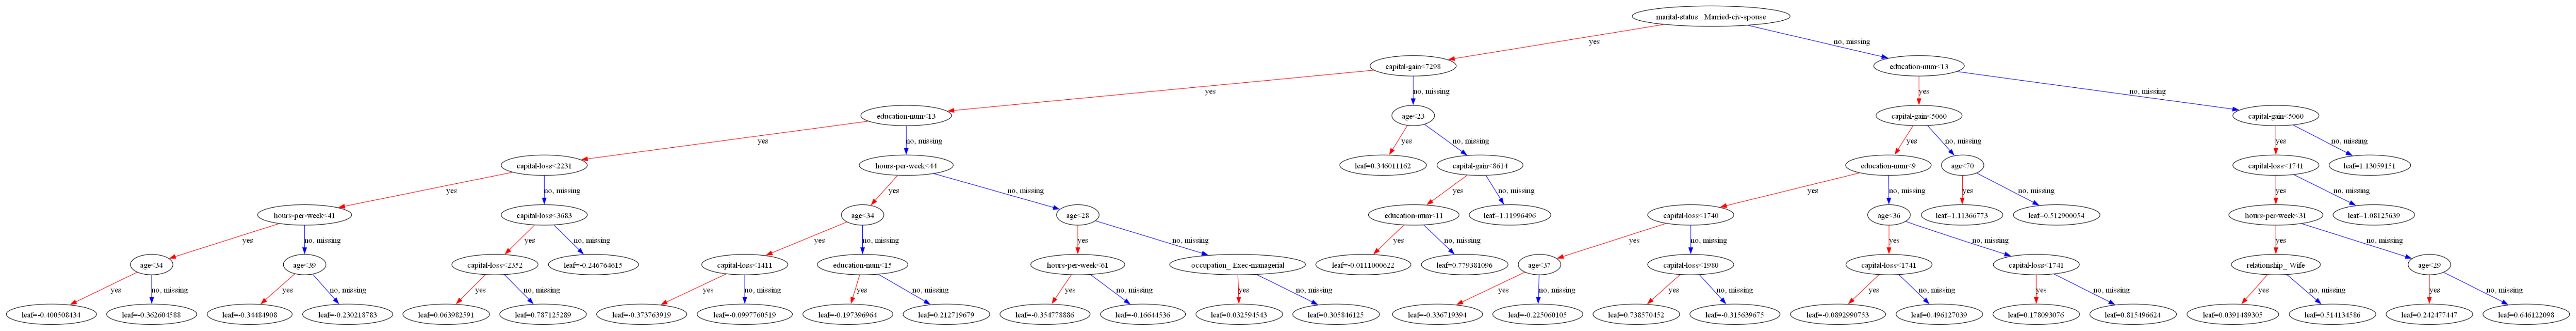

In [118]:
# Use "hist" for constructing the trees, with early stopping enabled.
clf = XGBClassifier(tree_method="hist", n_estimators=5)
# Fit the model, test sets are used for early stopping.
clf.fit(X, y)

##set the parameters of the visualisation
rcParams['figure.figsize'] = 80,50

# plot and save the boosted tree with the following
plot_tree(clf)
plt.savefig('xgbclassifier_tree.png')

# plot the 5th boosted tree with the following
# plot_tree(clf, num_trees=4)
# plt.savefig('xgbclassifier_tree4.png')


# Save model into JSON format.
# clf.save_model("clf.json")

In [114]:
print(df_census.iloc[13])

age                                    32
fnlwgt                             205019
education-num                          12
capital-gain                            0
capital-loss                            0
                                    ...  
native-country_ Trinadad&Tobago     False
native-country_ United-States        True
native-country_ Vietnam             False
native-country_ Yugoslavia          False
income_ >50K                        False
Name: 13, Length: 109, dtype: object
